In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.version

# To ignore any warnings
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset : Imported in csv format as the data received is in .txt format.
dataset = pd.read_csv('XYZCorp_LendingData.txt',delimiter='\t',low_memory=False)

This file containg complete data of the loan issed by the XYZ Corp. from the year 2007 to 2015. It provides Loan details along with the credit history, payment details, outstanding amount, defaulter, etc,.

In [3]:
dataset.shape

(855969, 73)

# Data Preprocessing
Exploring data by checking its dtypes, missing/null values if any and dropping the non-essentials columns.

In [4]:
# For exploring all the availabe rows and columns data.
pd.set_option("display.max_columns",None)
#pd.set_option("display.max_rows",None)

In [5]:
# Missing values sum
a=dataset.isnull().sum()

# Missing values in count & percentage
b=round(100*(dataset.isnull().sum()/len(dataset.index)), 2)
missing=pd.DataFrame(data=[a,b])
print(missing)

    id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  0.0        0.0        0.0          0.0              0.0   0.0       0.0   
1  0.0        0.0        0.0          0.0              0.0   0.0       0.0   

   installment  grade  sub_grade  emp_title  emp_length  home_ownership  \
0          0.0    0.0        0.0   49443.00    43061.00             0.0   
1          0.0    0.0        0.0       5.78        5.03             0.0   

   annual_inc  verification_status  issue_d  pymnt_plan       desc  purpose  \
0         0.0                  0.0      0.0         0.0  734157.00      0.0   
1         0.0                  0.0      0.0         0.0      85.77      0.0   

   title  zip_code  addr_state  dti  delinq_2yrs  earliest_cr_line  \
0   33.0       0.0         0.0  0.0          0.0               0.0   
1    0.0       0.0         0.0  0.0          0.0               0.0   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0          

##### Droping the columns with huge number of missing values

In [6]:
dataset=dataset.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','mths_since_last_major_derog',
                      'annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m',
                      'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc',
                      'all_util','inq_fi','total_cu_tl','inq_last_12m'],1)

#### Dropping the columns based on differnt reason for each column

In [7]:
dataset=dataset.drop(['pymnt_plan','zip_code','addr_state','earliest_cr_line','emp_title','title',
                      'total_rec_late_fee','recoveries','collection_recovery_fee',
                      'last_pymnt_d','last_credit_pull_d','policy_code',
                      'application_type','acc_now_delinq','id','member_id','inq_last_6mths'],1)

 1. emp_title: In emp_title the mode(most frequently position is Teacher) but it is only 1.5% of whole data , it means Teacher cannot represent whole column of emp_title. And most importantly it would not not add any significant information in predicting the result,so i will drop this feature.
 
2. pymnt_plan: Excluded this variable as mostly their is no plan is assign to the observatoins ,not providing any information.


3. title: Length of the variable is "60954"on very higher side and dropping the same will not affect the model.


4. zip_code: Length of the variable is "931" and keeping the same will mislead the model, hence dropping the same.


5. addr_state: Length of the cariable is "51" and keeping the same will mislead the model, hence dropping the same.


6. earliest_cr_line: Length of the variable is high, thus increasing the dimenson of the model by not providing any significant information.


7. total_rec_late_fee: 98% of the values falls under "0" hence dropped the same from the model.


8. recoveries: 97% of the values falls under "0" hence dropped the same from the model.


9. collection_recovery_fee: 97% of the values falls under "0" hence dropped the same from the model.


10. last_pymnt_d: It's a time series data and not significant for the model so better to drop it.


11. last_credit_pull_d: It's a time series data and not significant for the model so better to drop it.


12. policy_code: It has only one category, no use in analysis because all the observation has only single value no need to analys,better to drop it.


13. application_type: No use in analysis because all the observation has almost same value no need to analyse, better to drop it.


14. acc_now_delinq: 98% of the data has value equal to zero ,better to frop it.


15. id: Less important variable and is not significant for the model.


16. member_id: Less important variable and is not significant for the model.


17. inq_last_6mths: More than 50% of the data falls under "0" or "no inquiry" category. Hence dropped the column.

##### sub_grade: grade assigned by XYZ Corporation Limited to their registered client 

In [8]:
# sub_grade modified and maintained with only numerical category
def sub_grade_no(data):
    data['sub_grade'] = data['sub_grade'].map(lambda x: int(x.lstrip('ABCDEFG')))
    return data

In [9]:
sub_grade_no(dataset).head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000,5000,4975.0,36 months,10.65,162.87,B,2,10+ years,RENT,24000.0,Verified,01/12/11,credit_card,27.65,0,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,171.62,0.0,NaN,NaN,NaN,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,4,< 1 year,RENT,30000.0,Source Verified,01/12/11,car,1.00,0,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,119.66,0.0,NaN,NaN,NaN,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,5,10+ years,RENT,12252.0,Not Verified,01/12/11,small_business,8.72,0,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,649.91,0.0,NaN,NaN,NaN,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,1,10+ years,RENT,49200.0,Source Verified,01/12/11,other,20.00,0,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,357.48,0.0,NaN,NaN,NaN,0
4,3000,3000,3000.0,60 months,12.69,67.79,B,5,1 year,RENT,80000.0,Source Verified,01/12/11,other,17.94,0,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,67.79,0.0,NaN,NaN,NaN,0


##### emp_length: Work experience provided while registering for the loan

In [10]:
# Filling missing values with mode
dataset['emp_length'].mode()[0]
dataset['emp_length'].fillna(dataset['emp_length'].mode()[0],inplace=True)
print(dataset.emp_length)

0         10+ years
1          < 1 year
2         10+ years
3         10+ years
4            1 year
            ...    
855964      8 years
855965    10+ years
855966      5 years
855967       1 year
855968    10+ years
Name: emp_length, Length: 855969, dtype: object


In [11]:
# Manually re-labelling the emp_length, to keep it with only the numerical dtype
dataset.emp_length.value_counts()
emp_length={'10+ years':10,'2 years':2,'< 1 year':1,'3 years':3,'1 year':1,'5 years':5,'4 years':4, '7 years':7,
            '8 years':8,'6 years':6, '9 years':9}
dataset.emp_length=[emp_length[item]for item in dataset.emp_length]
print(dataset.emp_length)

0         10
1          1
2         10
3         10
4          1
          ..
855964     8
855965    10
855966     5
855967     1
855968    10
Name: emp_length, Length: 855969, dtype: int64


In [12]:
dataset.emp_length.value_counts()

10    325151
1     122452
2      75986
3      67392
5      53812
4      50643
7      43204
8      42421
6      41446
9      33462
Name: emp_length, dtype: int64

##### revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [13]:
# Filling missing values with mean
dataset['revol_util'].fillna(dataset['revol_util'].mean(), inplace=True)

##### tot_cur_bal: Total current balance of all accounts

In [14]:
# Filling missing values with mean
dataset['tot_cur_bal'].fillna(dataset['tot_cur_bal'].mean(), inplace=True)

##### total_rev_hi_lim: Total revolving high credit/credit limit
The difference is less between the mean and median as compare to the above variables,replacing missing value with median.

In [15]:
# Filling missing values with mean
dataset['total_rev_hi_lim'].fillna(dataset['total_rev_hi_lim'].mean(), inplace=True)

##### collections_12_mths_ex_med:

In [16]:
# Filling missing values with mean
dataset['collections_12_mths_ex_med'].fillna(dataset['collections_12_mths_ex_med'].mean(), inplace=True)

##### tot_coll_amt:

In [17]:
# Filling missing values with mean
dataset.tot_coll_amt.value_counts()
dataset['tot_coll_amt'].fillna(dataset['tot_coll_amt'].mean(), inplace=True)

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

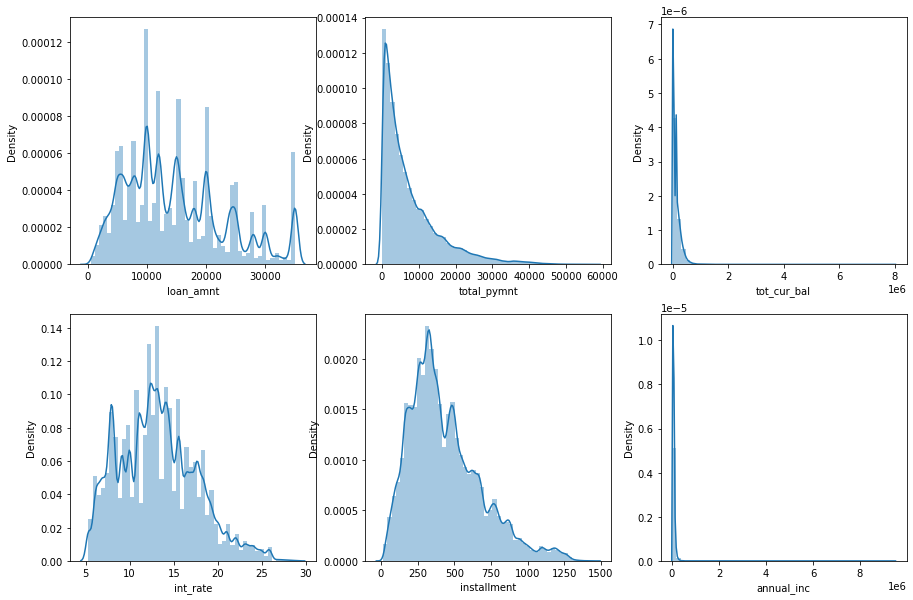

In [18]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.distplot(dataset["loan_amnt"])
plt.subplot(2,3,2)
sns.distplot(dataset["total_pymnt"])
plt.subplot(2,3,3)
sns.distplot(dataset["tot_cur_bal"])
plt.subplot(2,3,4)
sns.distplot(dataset["int_rate"])
plt.subplot(2,3,5)
sns.distplot(dataset["installment"])
plt.subplot(2,3,6)
sns.distplot(dataset["annual_inc"])

Text(0, 0.5, 'default_ind')

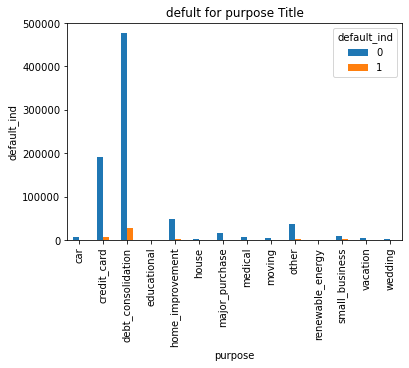

In [19]:
pd.crosstab(dataset.purpose,dataset.default_ind).plot(kind='bar')
plt.title('defult for purpose Title')
plt.xlabel('purpose')
plt.ylabel('default_ind')
#plt.savefig('purpose')

Text(0, 0.5, 'default_ind')

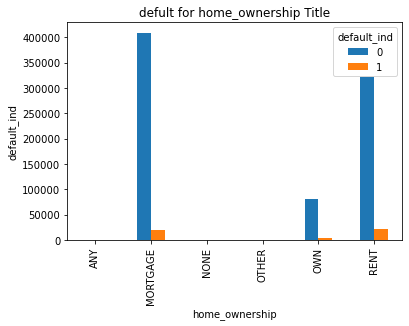

In [20]:
pd.crosstab(dataset.home_ownership,dataset.default_ind).plot(kind='bar')
plt.title('defult for home_ownership Title')
plt.xlabel('home_ownership')
plt.ylabel('default_ind')
#plt.savefig('home_ownership')

Text(0, 0.5, 'default_ind')

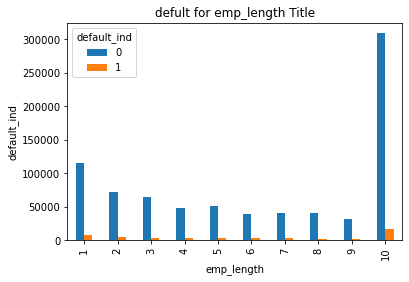

In [21]:
pd.crosstab(dataset.emp_length,dataset.default_ind).plot(kind='bar')
plt.title('defult for emp_length Title')
plt.xlabel('emp_length')
plt.ylabel('default_ind')
#plt.savefig('emp_length')

Text(0, 0.5, 'default_ind')

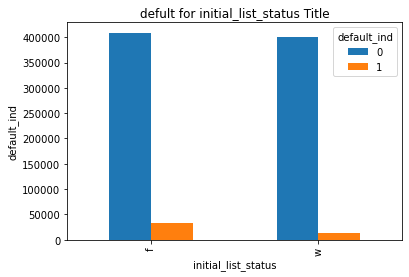

In [22]:
pd.crosstab(dataset.initial_list_status,dataset.default_ind).plot(kind='bar')
plt.title('defult for initial_list_status Title')
plt.xlabel('initial_list_status')
plt.ylabel('default_ind')
#plt.savefig('initial_list_status')

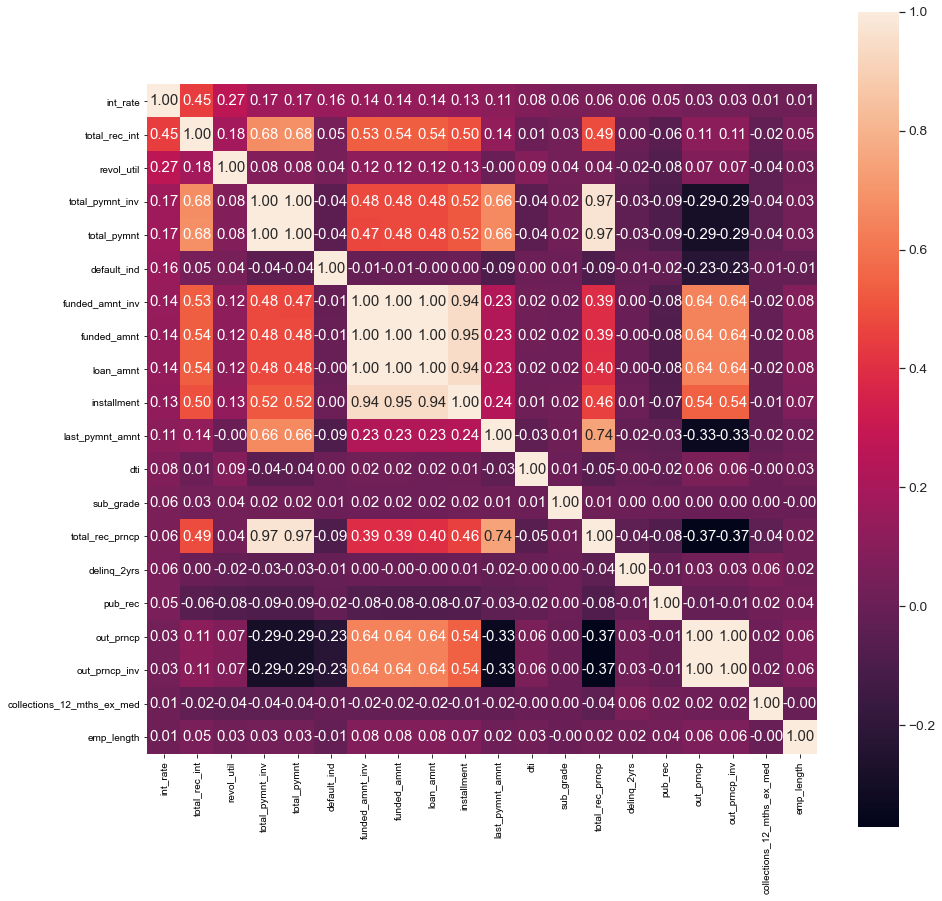

In [23]:
corrmat = dataset.corr()
plt.subplots(figsize=(15,15))
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k,'int_rate')['int_rate'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [24]:
# Variable created with "Colname" to convert the required "object" category data into "numerical"  category for model
colname = ['term','grade','emp_length','home_ownership','verification_status','purpose','initial_list_status']
colname

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status']

In [25]:
# For preprocessing the data (Label encoder will convert "object" into "numerical" category)
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for x in colname:
    dataset[x]=le.fit_transform(dataset[x])

In [26]:
dataset.dtypes

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                            int64
int_rate                      float64
installment                   float64
grade                           int64
sub_grade                       int64
emp_length                      int64
home_ownership                  int64
annual_inc                    float64
verification_status             int64
issue_d                        object
purpose                         int64
dti                           float64
delinq_2yrs                     int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
initial_list_status             int64
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt                   float64
total_pymnt_inv               float64
total_rec_pr

In [27]:
dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000,5000,4975.0,0,10.65,162.87,1,2,9,5,24000.0,2,01/12/11,1,27.65,0,3,0,13648,83.7,9,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,171.62,0.0,225.412882,139766.247529,32163.574526,0
1,2500,2500,2500.0,1,15.27,59.83,2,4,0,5,30000.0,1,01/12/11,0,1.00,0,3,0,1687,9.4,4,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,119.66,0.0,225.412882,139766.247529,32163.574526,1
2,2400,2400,2400.0,0,15.96,84.33,2,5,9,5,12252.0,0,01/12/11,11,8.72,0,2,0,2956,98.5,10,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,649.91,0.0,225.412882,139766.247529,32163.574526,0
3,10000,10000,10000.0,0,13.49,339.31,2,1,9,5,49200.0,1,01/12/11,9,20.00,0,10,0,5598,21.0,37,0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,357.48,0.0,225.412882,139766.247529,32163.574526,0
4,3000,3000,3000.0,1,12.69,67.79,1,5,0,5,80000.0,1,01/12/11,9,17.94,0,15,0,27783,53.9,38,0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,67.79,0.0,225.412882,139766.247529,32163.574526,0


In [28]:
dataset.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
dti                           0
delinq_2yrs                   0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
tot_coll_amt                  0
tot_cur_

In [29]:
df=dataset

##### Converting object dtype into datetime: issue_d

In [30]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df=df.sort_values('issue_d')
df=df.set_index(df['issue_d'])
df=df.drop(['issue_d'],1)
print(df.head())

            loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
issue_d                                                               
2007-01-06       7500         7500            800.0     0     13.75   
2007-01-07       5000         5000           4150.0     0      7.43   
2007-01-07       5750         5750           3675.0     0      7.43   
2007-01-07       5000         5000           3975.0     0      7.43   
2007-01-07       1200         1200              0.0     0     11.54   

            installment  grade  sub_grade  emp_length  home_ownership  \
issue_d                                                                 
2007-01-06       255.43      4          2           0               4   
2007-01-07       155.38      0          2           7               1   
2007-01-07       178.69      0          2           9               1   
2007-01-07       155.38      0          2           5               5   
2007-01-07        39.60      2          5           0           

### Standard Scaller:

In [31]:
X=df.drop(['default_ind'],1)
Y=df['default_ind']
print(X.head())
print(Y.head())

            loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
issue_d                                                               
2007-01-06       7500         7500            800.0     0     13.75   
2007-01-07       5000         5000           4150.0     0      7.43   
2007-01-07       5750         5750           3675.0     0      7.43   
2007-01-07       5000         5000           3975.0     0      7.43   
2007-01-07       1200         1200              0.0     0     11.54   

            installment  grade  sub_grade  emp_length  home_ownership  \
issue_d                                                                 
2007-01-06       255.43      4          2           0               4   
2007-01-07       155.38      0          2           7               1   
2007-01-07       178.69      0          2           9               1   
2007-01-07       155.38      0          2           5               5   
2007-01-07        39.60      2          5           0           

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[-8.59974264e-01 -8.59006696e-01 -1.64970214e+00 ...  0.00000000e+00
   0.00000000e+00  1.00532961e-16]
 [-1.15669837e+00 -1.15593762e+00 -1.25211381e+00 ...  0.00000000e+00
   0.00000000e+00  1.00532961e-16]
 [-1.06768114e+00 -1.06685834e+00 -1.30848827e+00 ...  0.00000000e+00
   0.00000000e+00  1.00532961e-16]
 ...
 [-3.25870877e-01 -3.24531041e-01 -3.20451595e-01 ... -2.23878130e-02
  -4.93471932e-01 -3.08497455e-01]
 [ 2.40399088e+00  2.40723342e+00  2.40925935e+00 ... -2.23878130e-02
  -8.83464760e-01 -1.75852863e-01]
 [ 2.34464605e+00  2.34784724e+00  2.34991781e+00 ... -2.23878130e-02
  -6.21746046e-01  7.66476422e-01]]


### Splitting Data into Training and Test Sets

In [33]:
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)

In [34]:
X_train = X.iloc[:598978,:]
X_test = X.iloc[598979:,:]

Y_train = Y.iloc[:598978,:]
Y_test = Y.iloc[598979:,:]

In [35]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(598978, 32)
(598978, 1)
(256990, 32)
(256990, 1)


In [36]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-0.859974,-0.859007,-1.649702,-0.652755,0.127663,-0.741848,1.703269,-0.684680,-1.493050,0.574472,-0.825825,-1.29518,-0.247568,-0.219941,0.803066,-0.855759,-0.334495,-0.573060,-0.147841,-1.461165,-0.966516,-0.97907,-0.979069,0.194918,-0.842288,0.247013,-0.028855,-0.404812,0.0,0.0,0.0,1.005330e-16
1,-1.156698,-1.155938,-1.252114,-0.652755,-1.319103,-1.152348,-1.362714,-0.684680,0.479439,-0.986529,1.165945,-1.29518,0.632971,-1.040092,-0.363538,-1.797718,-0.334495,-0.488556,-1.492076,-0.530447,-0.966516,-0.97907,-0.979069,-0.313441,-0.422015,-0.127440,-0.759419,0.446352,0.0,0.0,0.0,1.005330e-16
2,-1.067681,-1.066858,-1.308488,-0.652755,-1.319103,-1.056708,-1.362714,-0.684680,1.043007,-0.986529,0.776928,-1.29518,-0.247568,-1.024596,-0.363538,-0.290584,-0.334495,-0.634166,-1.882744,-0.784279,-0.966516,-0.97907,-0.979069,-0.155739,-0.446159,-0.015104,-0.520512,-0.456580,0.0,0.0,0.0,1.005330e-16
3,-1.156698,-1.155938,-1.272883,-0.652755,-1.319103,-1.152348,-1.362714,-0.684680,-0.084129,1.094806,-0.545732,-1.29518,-1.128108,-0.893739,-0.363538,-1.420934,-0.334495,-0.645640,-1.723116,-1.545776,-0.966516,-0.97907,-0.979069,-0.260438,-0.402716,-0.127440,-0.558035,-0.424944,0.0,0.0,0.0,1.005330e-16
4,-1.607719,-1.607273,-1.744649,-0.652755,-0.378247,-1.627388,0.170277,1.438642,-1.493050,1.094806,-0.856947,-1.29518,-0.687838,-0.923009,-0.363538,-1.609326,-0.334495,-0.709041,0.872937,-1.799608,-0.966516,-0.97907,-0.979069,-0.787410,-0.966655,-0.696608,-0.734824,-0.449445,0.0,0.0,0.0,1.005330e-16


In [37]:
Y_train.head()

,default_ind
issue_d,
2007-01-06,0
2007-01-07,0
2007-01-07,0
2007-01-07,0
2007-01-07,0


In [38]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(598978, 32)
(598978, 1)
(256990, 32)
(256990, 1)


## DecisionTreesClassifier: Base Model

In [39]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_leaf=6, max_leaf_nodes=10,
                                          random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

[0 0 0 ... 0 0 0]


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[256678      1]
 [    64    247]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256679
           1       1.00      0.79      0.88       311

    accuracy                           1.00    256990
   macro avg       1.00      0.90      0.94    256990
weighted avg       1.00      1.00      1.00    256990

Accuracy of the model:  0.9997470718705008


### Thank You, Here we finalize DecisionTreeClassifier - Base Model